In [73]:
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [74]:
data = pd.read_csv("Downloads/house price data.csv")

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [76]:
data.describe()

price     bedrooms    bathrooms   sqft_living      sqft_lot  \
count  4.600000e+03  4600.000000  4600.000000   4600.000000  4.600000e+03   
mean   5.519630e+05     3.400870     2.160815   2139.346957  1.485252e+04   
std    5.638347e+05     0.908848     0.783781    963.206916  3.588444e+04   
min    0.000000e+00     0.000000     0.000000    370.000000  6.380000e+02   
25%    3.228750e+05     3.000000     1.750000   1460.000000  5.000750e+03   
50%    4.609435e+05     3.000000     2.250000   1980.000000  7.683000e+03   
75%    6.549625e+05     4.000000     2.500000   2620.000000  1.100125e+04   
max    2.659000e+07     9.000000     8.000000  13540.000000  1.074218e+06   

            floors   waterfront         view    condition   sqft_above  \
count  4600.000000  4600.000000  4600.000000  4600.000000  4600.000000   
mean      1.512065     0.007174     0.240652     3.451739  1827.265435   
std       0.538288     0.084404     0.778405     0.677230   862.168977   
min       1.000000     0.000000     0.000000     1.000000   370.000000   
25%       1.000000     0.000000     0.000000     3.000000  1190.000000   
50%       1.500000     0.000000     0.000000     3.000000  1590.000000   
75%       2.000000     0.000000     0.000000     4.000000  2300.000000   
max       3.500000     1.000000     4.000000     5.000000  9410.000000   

       sqft_basement     yr_built  yr_renovated  
count    4600.000000  4600.000000   4600.000000  
mean      312.081522  1970.786304    808.608261  
std       464.137228    29.731848    979.414536  
min         0.000000  1900.000000      0.000000  
25%         0.000000  1951.000000      0.000000  
50%         0.000000  1976.000000      0.000000  
75%       610.000000  1997.000000   1999.000000  
max      4820.000000  2014.000000   2014.000000

In [77]:
data.head()

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_renovated                    street       city  statezip country  
0          2005      18810 Densmore Ave N  Shoreline  WA 98133     USA  
1             0           709 W Blaine St    Seattle  WA 98119     USA  
2             0  26206-26214 143rd Ave SE       Kent  WA 98042     USA  
3             0           857 170th Pl NE   Bellevue  WA 98008     USA  
4          1992         9105 170th Ave NE    Redmond  WA 98052     USA

In [78]:
data.isnull()

date  price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0     False  False     False      False        False     False   False   
1     False  False     False      False        False     False   False   
2     False  False     False      False        False     False   False   
3     False  False     False      False        False     False   False   
4     False  False     False      False        False     False   False   
...     ...    ...       ...        ...          ...       ...     ...   
4595  False  False     False      False        False     False   False   
4596  False  False     False      False        False     False   False   
4597  False  False     False      False        False     False   False   
4598  False  False     False      False        False     False   False   
4599  False  False     False      False        False     False   False   

      waterfront   view  condition  sqft_above  sqft_basement  yr_built  \
0          False  False      False       False          False     False   
1          False  False      False       False          False     False   
2          False  False      False       False          False     False   
3          False  False      False       False          False     False   
4          False  False      False       False          False     False   
...          ...    ...        ...         ...            ...       ...   
4595       False  False      False       False          False     False   
4596       False  False      False       False          False     False   
4597       False  False      False       False          False     False   
4598       False  False      False       False          False     False   
4599       False  False      False       False          False     False   

      yr_renovated  street   city  statezip  country  
0            False   False  False     False    False  
1            False   False  False     False    False  
2            False   False  False     False    False  
3            False   False  False     False    False  
4            False   False  False     False    False  
...            ...     ...    ...       ...      ...  
4595         False   False  False     False    False  
4596         False   False  False     False    False  
4597         False   False  False     False    False  
4598         False   False  False     False    False  
4599         False   False  False     False    False  

[4600 rows x 18 columns]

In [79]:
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [80]:
data.dropna()

date         price  bedrooms  bathrooms  sqft_living  \
0     2014-05-02 00:00:00  3.130000e+05       3.0       1.50         1340   
1     2014-05-02 00:00:00  2.384000e+06       5.0       2.50         3650   
2     2014-05-02 00:00:00  3.420000e+05       3.0       2.00         1930   
3     2014-05-02 00:00:00  4.200000e+05       3.0       2.25         2000   
4     2014-05-02 00:00:00  5.500000e+05       4.0       2.50         1940   
...                   ...           ...       ...        ...          ...   
4595  2014-07-09 00:00:00  3.081667e+05       3.0       1.75         1510   
4596  2014-07-09 00:00:00  5.343333e+05       3.0       2.50         1460   
4597  2014-07-09 00:00:00  4.169042e+05       3.0       2.50         3010   
4598  2014-07-10 00:00:00  2.034000e+05       4.0       2.00         2090   
4599  2014-07-10 00:00:00  2.206000e+05       3.0       2.50         1490   

      sqft_lot  floors  waterfront  view  condition  sqft_above  \
0         7912     1.5           0     0          3        1340   
1         9050     2.0           0     4          5        3370   
2        11947     1.0           0     0          4        1930   
3         8030     1.0           0     0          4        1000   
4        10500     1.0           0     0          4        1140   
...        ...     ...         ...   ...        ...         ...   
4595      6360     1.0           0     0          4        1510   
4596      7573     2.0           0     0          3        1460   
4597      7014     2.0           0     0          3        3010   
4598      6630     1.0           0     0          3        1070   
4599      8102     2.0           0     0          4        1490   

      sqft_basement  yr_built  yr_renovated                    street  \
0                 0      1955          2005      18810 Densmore Ave N   
1               280      1921             0           709 W Blaine St   
2                 0      1966             0  26206-26214 143rd Ave SE   
3              1000      1963             0           857 170th Pl NE   
4               800      1976          1992         9105 170th Ave NE   
...             ...       ...           ...                       ...   
4595              0      1954          1979            501 N 143rd St   
4596              0      1983          2009          14855 SE 10th Pl   
4597              0      2009             0          759 Ilwaco Pl NE   
4598           1020      1974             0         5148 S Creston St   
4599              0      1990             0         18717 SE 258th St   

           city  statezip country  
0     Shoreline  WA 98133     USA  
1       Seattle  WA 98119     USA  
2          Kent  WA 98042     USA  
3      Bellevue  WA 98008     USA  
4       Redmond  WA 98052     USA  
...         ...       ...     ...  
4595    Seattle  WA 98133     USA  
4596   Bellevue  WA 98007     USA  
4597     Renton  WA 98059     USA  
4598    Seattle  WA 98178     USA  
4599  Covington  WA 98042     USA  

[4600 rows x 18 columns]

In [81]:
print(data)

                     date         price  bedrooms  bathrooms  sqft_living  \
0     2014-05-02 00:00:00  3.130000e+05       3.0       1.50         1340   
1     2014-05-02 00:00:00  2.384000e+06       5.0       2.50         3650   
2     2014-05-02 00:00:00  3.420000e+05       3.0       2.00         1930   
3     2014-05-02 00:00:00  4.200000e+05       3.0       2.25         2000   
4     2014-05-02 00:00:00  5.500000e+05       4.0       2.50         1940   
...                   ...           ...       ...        ...          ...   
4595  2014-07-09 00:00:00  3.081667e+05       3.0       1.75         1510   
4596  2014-07-09 00:00:00  5.343333e+05       3.0       2.50         1460   
4597  2014-07-09 00:00:00  4.169042e+05       3.0       2.50         3010   
4598  2014-07-10 00:00:00  2.034000e+05       4.0       2.00         2090   
4599  2014-07-10 00:00:00  2.206000e+05       3.0       2.50         1490   

      sqft_lot  floors  waterfront  view  condition  sqft_above  \
0       

In [82]:
data.drop_duplicates(inplace=True)

In [83]:
print(data)

                     date         price  bedrooms  bathrooms  sqft_living  \
0     2014-05-02 00:00:00  3.130000e+05       3.0       1.50         1340   
1     2014-05-02 00:00:00  2.384000e+06       5.0       2.50         3650   
2     2014-05-02 00:00:00  3.420000e+05       3.0       2.00         1930   
3     2014-05-02 00:00:00  4.200000e+05       3.0       2.25         2000   
4     2014-05-02 00:00:00  5.500000e+05       4.0       2.50         1940   
...                   ...           ...       ...        ...          ...   
4595  2014-07-09 00:00:00  3.081667e+05       3.0       1.75         1510   
4596  2014-07-09 00:00:00  5.343333e+05       3.0       2.50         1460   
4597  2014-07-09 00:00:00  4.169042e+05       3.0       2.50         3010   
4598  2014-07-10 00:00:00  2.034000e+05       4.0       2.00         2090   
4599  2014-07-10 00:00:00  2.206000e+05       3.0       2.50         1490   

      sqft_lot  floors  waterfront  view  condition  sqft_above  \
0       

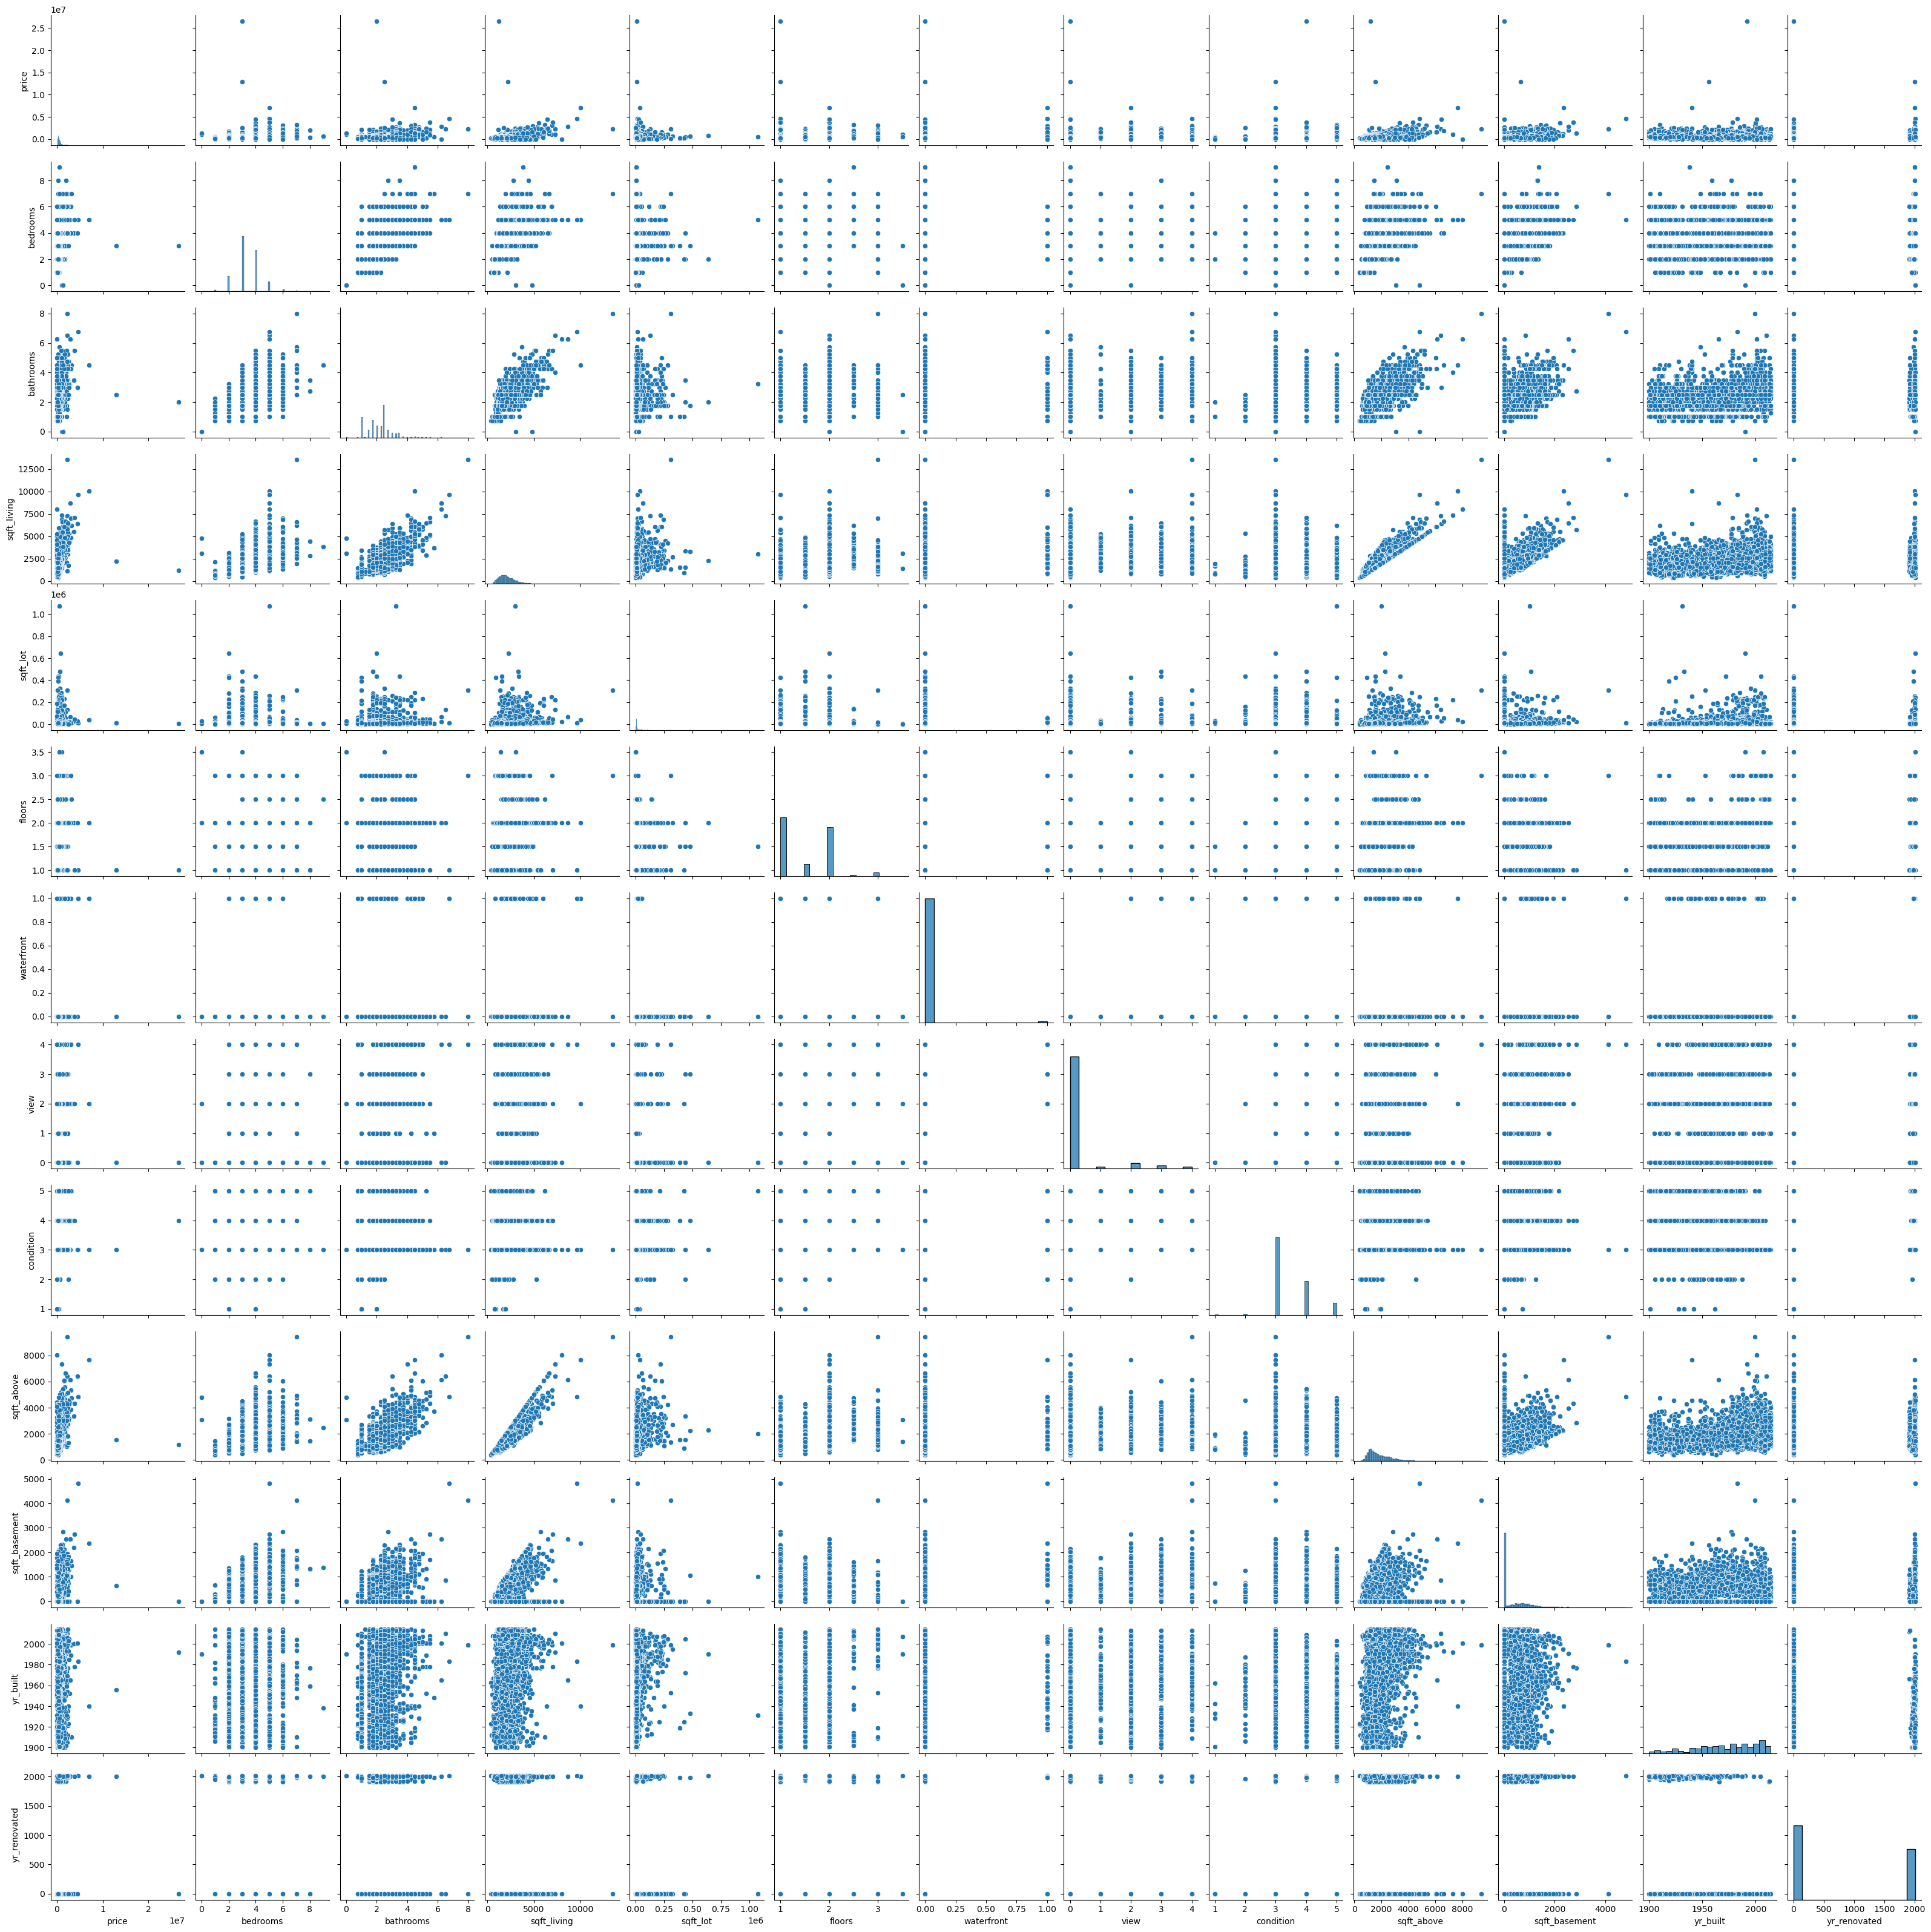

In [85]:
sns.pairplot(data)

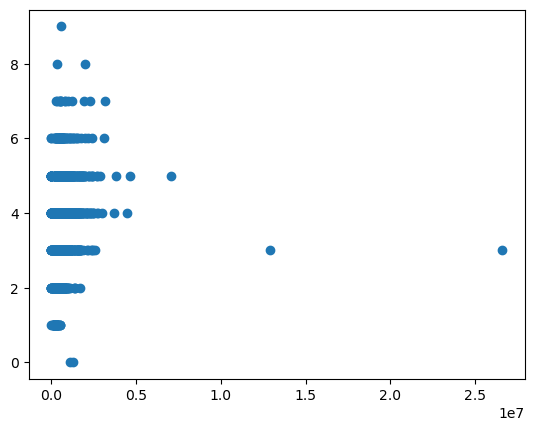

In [86]:
plt.scatter(data['price'], data['bedrooms'])

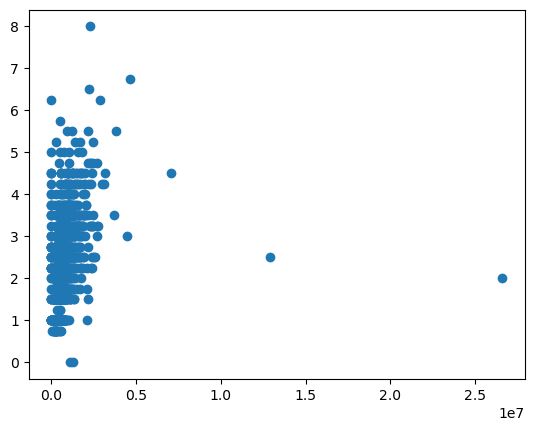

In [87]:
plt.scatter(data['price'], data['bathrooms'])

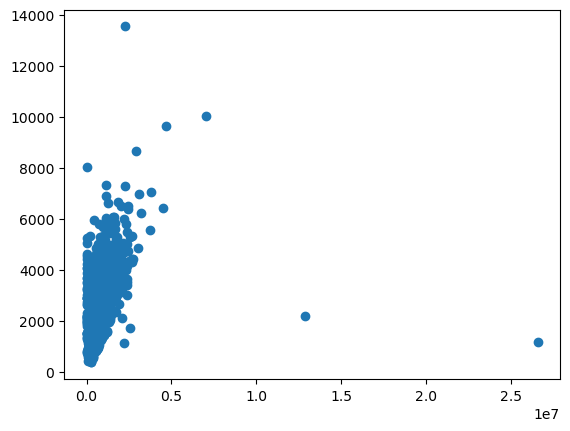

In [88]:
plt.scatter(data['price'], data['sqft_living'])

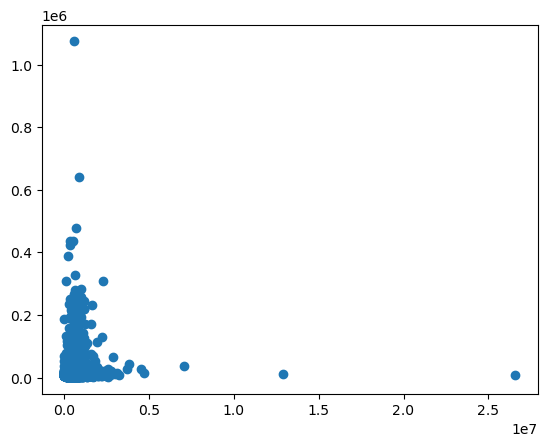

In [89]:
plt.scatter(data['price'], data['sqft_lot'])

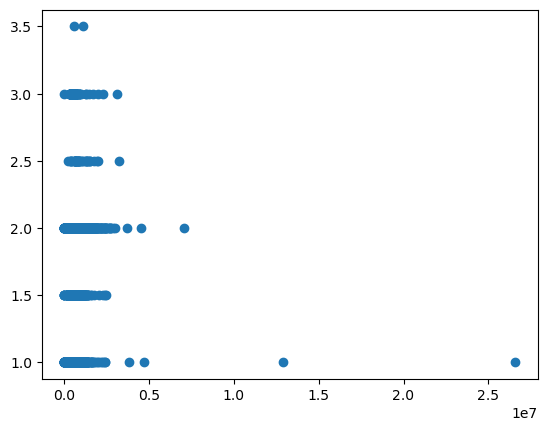

In [90]:
plt.scatter(data['price'], data['floors'])

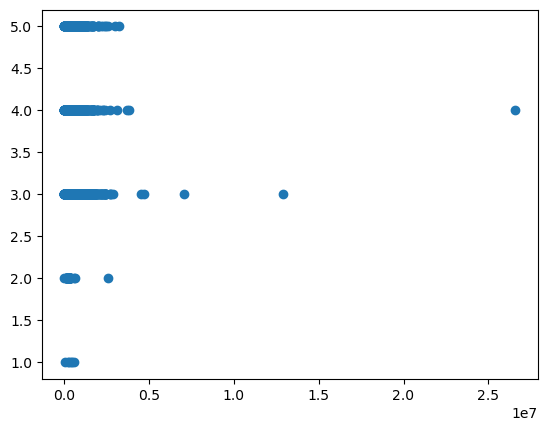

In [91]:
plt.scatter(data['price'], data['condition'])

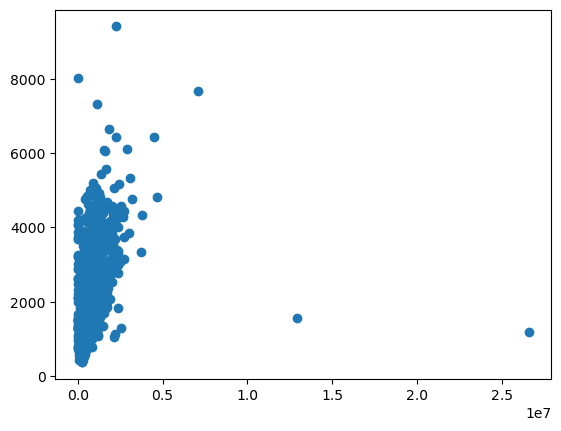

In [92]:
plt.scatter(data['price'], data['sqft_above'])

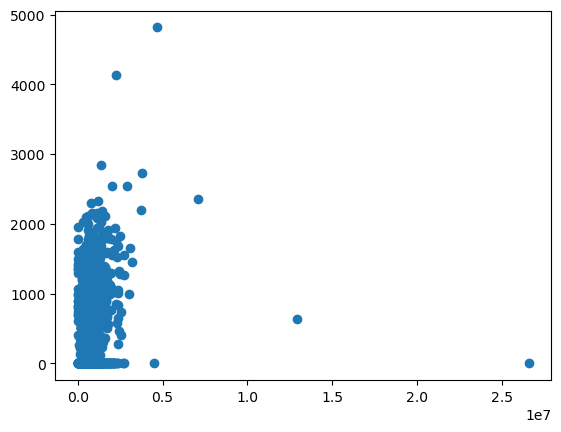

In [93]:
plt.scatter(data['price'], data['sqft_basement'])

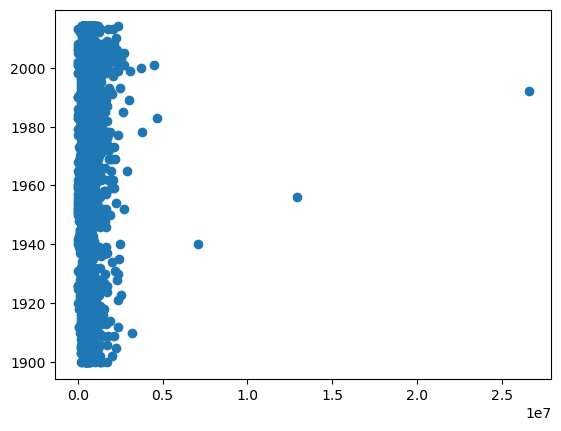

In [94]:
plt.scatter(data['price'], data['yr_built'])

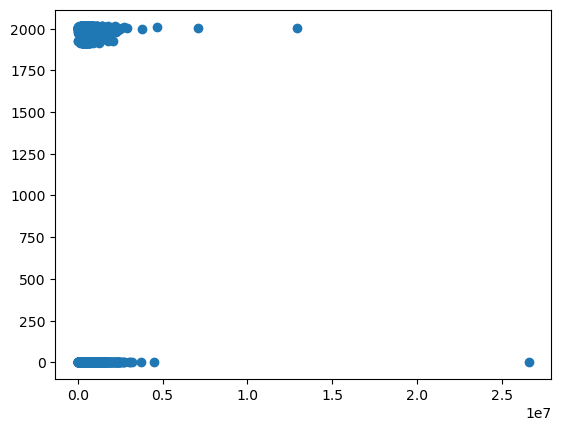

In [95]:
plt.scatter(data['price'], data['yr_renovated'])

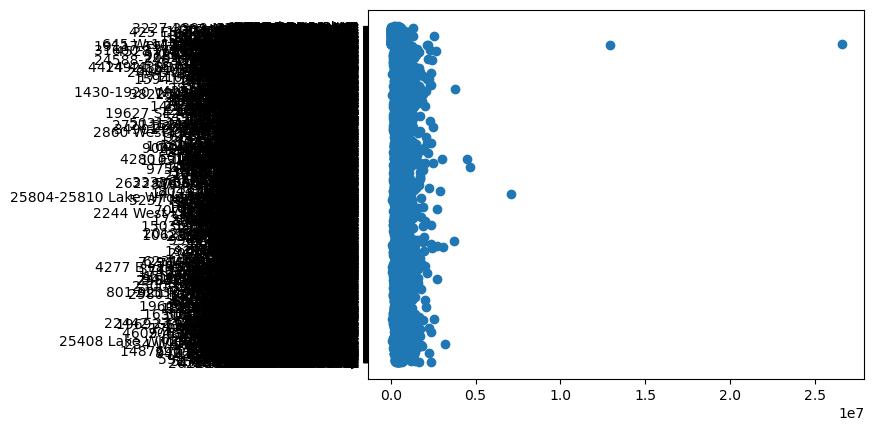

In [96]:
plt.scatter(data['price'], data['street'])

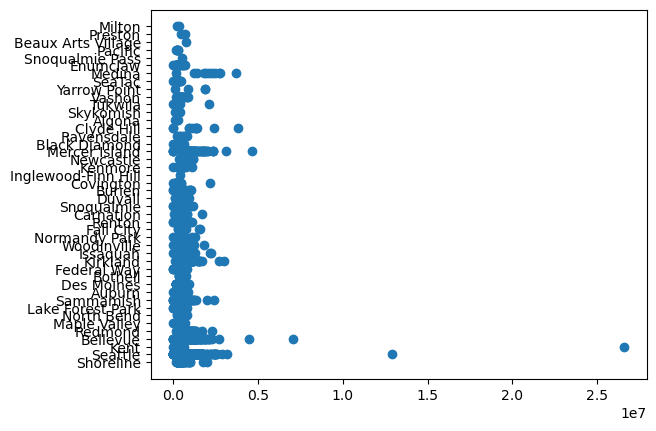

In [97]:
plt.scatter(data['price'], data['city'])

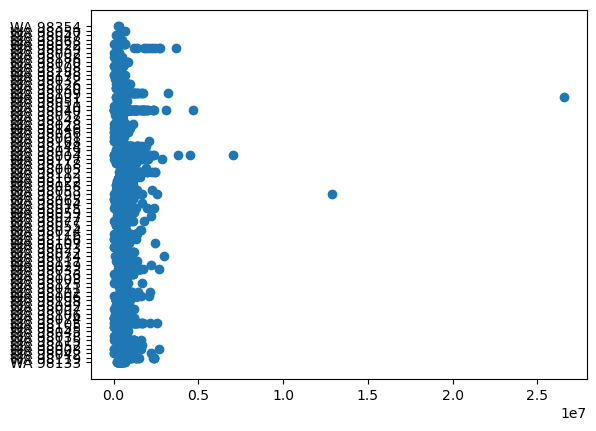

In [98]:
plt.scatter(data['price'], data['statezip'])

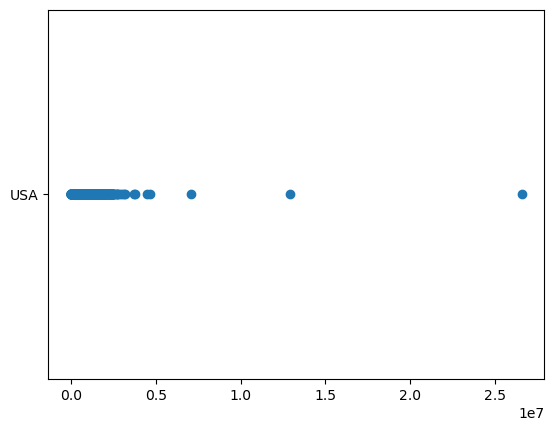

In [99]:
plt.scatter(data['price'], data['country'])

In [100]:
data.dropna(how='all', axis=1, inplace=True)

In [101]:
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [102]:
X = data[['bathrooms', 'sqft_living','sqft_lot','condition','sqft_above','yr_built','street','statezip']]
y = data[['price']]

In [103]:
X

bathrooms  sqft_living  sqft_lot  condition  sqft_above  yr_built  \
0          1.50         1340      7912          3        1340      1955   
1          2.50         3650      9050          5        3370      1921   
2          2.00         1930     11947          4        1930      1966   
3          2.25         2000      8030          4        1000      1963   
4          2.50         1940     10500          4        1140      1976   
...         ...          ...       ...        ...         ...       ...   
4595       1.75         1510      6360          4        1510      1954   
4596       2.50         1460      7573          3        1460      1983   
4597       2.50         3010      7014          3        3010      2009   
4598       2.00         2090      6630          3        1070      1974   
4599       2.50         1490      8102          4        1490      1990   

                        street  statezip  
0         18810 Densmore Ave N  WA 98133  
1              709 W Blaine St  WA 98119  
2     26206-26214 143rd Ave SE  WA 98042  
3              857 170th Pl NE  WA 98008  
4            9105 170th Ave NE  WA 98052  
...                        ...       ...  
4595            501 N 143rd St  WA 98133  
4596          14855 SE 10th Pl  WA 98007  
4597          759 Ilwaco Pl NE  WA 98059  
4598         5148 S Creston St  WA 98178  
4599         18717 SE 258th St  WA 98042  

[4600 rows x 8 columns]

In [104]:
y

price
0     3.130000e+05
1     2.384000e+06
2     3.420000e+05
3     4.200000e+05
4     5.500000e+05
...            ...
4595  3.081667e+05
4596  5.343333e+05
4597  4.169042e+05
4598  2.034000e+05
4599  2.206000e+05

[4600 rows x 1 columns]

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [106]:
len(X)

4600

In [107]:
len(X_train)

3450

In [108]:
len(X_test)

1150

In [109]:
X_train

bathrooms  sqft_living  sqft_lot  condition  sqft_above  yr_built  \
1797       2.25         1870      9000          3        1440      1978   
2967       4.25         6900    244716          4        4820      2002   
435        1.75         2320      8100          4        1160      1956   
2582       2.50         2240      9826          4        1370      1988   
3680       3.00         3720     15048          3        3720      1979   
...         ...          ...       ...        ...         ...       ...   
2759       3.00         2795     15101          3        2795      1996   
3137       2.00         1340      8505          3        1340      1931   
3383       1.00         1150     11802          4        1150      1932   
1313       2.50         1560      4200          3        1560      2003   
3169       1.75         1520      6380          3         790      1948   

                  street  statezip  
1797   10559 NE 150th Ct  WA 98011  
2967  16903 246th Ave NE  WA 98077  
435      439 SW 156th St  WA 98166  
2582    2410 SW 323rd St  WA 98023  
3680  10218 147th Ave SE  WA 98059  
...                  ...       ...  
2759   14308 274th Pl NE  WA 98019  
3137     2730 S 146th St  WA 98168  
3383    4533 21st Ave SW  WA 98106  
1313   23620 SE 243rd Pl  WA 98038  
3169     2302 NE 91st St  WA 98115  

[3450 rows x 8 columns]

In [110]:
X_test

bathrooms  sqft_living  sqft_lot  condition  sqft_above  yr_built  \
1329       1.00         1570      9467          3        1570      1954   
1365       3.00         2840      7199          3        1710      2003   
940        2.50         2660      4975          3        2660      2014   
2545       1.75         1210      1040          3        1210      2014   
3632       1.75         1510      4980          3        1510      2006   
...         ...          ...       ...        ...         ...       ...   
695        3.25         3200      7081          3        3200      2004   
1952       4.75         5180     17811          3        4070      2001   
1831       3.25         1530      1602          3        1140      2013   
3015       1.00         1230      1820          4         830      1948   
23         2.50         2730     12261          3        2730      1991   

                        street  statezip  
1329          19141 1st Ave NW  WA 98177  
1365          10719 47th Ave S  WA 98178  
940          4810 S Raymond St  WA 98118  
2545     2520 Mulberry Walk NE  WA 98029  
3632  13471 Adair Creek Way NE  WA 98053  
...                        ...       ...  
695           26054 SE 23rd Pl  WA 98075  
1952       6766 Cascade Ave SE  WA 98065  
1831          5201 23rd Ave SW  WA 98106  
3015         3257 NW Market St  WA 98107  
23           10212 NE 156th Pl  WA 98011  

[1150 rows x 8 columns]

In [111]:
y_test

price
1329   360000.0
1365   292050.0
940    599950.0
2545   357186.0
3632   419000.0
...         ...
695    707000.0
1952  1075000.0
1831   320000.0
3015   375000.0
23     612500.0

[1150 rows x 1 columns]

In [112]:
y_train

price
1797   425000.0
2967  1135000.0
435    315000.0
2582   220000.0
3680   500000.0
...         ...
2759   562000.0
3137   215000.0
3383   346500.0
1313   295000.0
3169   438000.0

[3450 rows x 1 columns]

In [113]:
X = X.apply(pd.to_numeric, errors='coerce')
y = y.apply(pd.to_numeric, errors='coerce')

In [114]:
X.fillna(0, inplace=True)
y.fillna(0, inplace=True)

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = LinearRegression().fit(X_train, y_train)

In [116]:
X_test

bathrooms  sqft_living  sqft_lot  condition  sqft_above  yr_built  \
991         2.5         2090      4700          3        2090      2002   
2824        2.5         2640      8625          3        2640      1987   
1906        1.0          650     15364          4         650      1967   
1471        2.0         2510     38141          3        2510      1960   
1813        3.5         2790     10125          5        2790      1985   
...         ...          ...       ...        ...         ...       ...   
196         2.5         2000      5684          3        2000      1996   
4315        2.0         1470      8395          4        1470      1965   
4550        1.5         1090      8160          3        1090      1967   
2941        2.5         2200      4080          5        1420      1916   
3987        3.5         3000      8401          3        1500      1979   

      street  statezip  
991      0.0       0.0  
2824     0.0       0.0  
1906     0.0       0.0  
1471     0.0       0.0  
1813     0.0       0.0  
...      ...       ...  
196      0.0       0.0  
4315     0.0       0.0  
4550     0.0       0.0  
2941     0.0       0.0  
3987     0.0       0.0  

[1150 rows x 8 columns]

In [117]:
clf.predict(X_test)

array([[489552.60260329],
       [655520.11798079],
       [158167.35910777],
       ...,
       [272372.27042607],
       [754844.66642781],
       [783650.70939545]])

In [118]:
y_test

price
991    289000.0
2824   429900.0
1906   129000.0
1471   600000.0
1813  1298000.0
...         ...
196    513000.0
4315   445000.0
4550   214750.0
2941   547000.0
3987   527000.0

[1150 rows x 1 columns]

In [119]:
clf.score(X_test,y_test)

0.5055879409353861

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.40,random_state=101)
X_test

bathrooms  sqft_living  sqft_lot  condition  sqft_above  yr_built  \
4032       3.00         5430    108900          4        5430      1987   
1558       2.25         2270      8876          3        1380      1977   
2004       2.50         2070      4500          3        2070      2004   
3186       2.25         2550      6000          5        1860      1902   
4176       1.50         1460      9908          3        1460      1952   
...         ...          ...       ...        ...         ...       ...   
1105       2.50         2160      8005          3        2160      1993   
3797       1.75         1420      5000          4        1420      1945   
166        2.00         1520      7983          5        1520      1967   
154        2.50         2150     37981          3        2150      1985   
1196       2.50         2980      8107          3        2980      2000   

      street  statezip  
4032     0.0       0.0  
1558     0.0       0.0  
2004     0.0       0.0  
3186     0.0       0.0  
4176     0.0       0.0  
...      ...       ...  
1105     0.0       0.0  
3797     0.0       0.0  
166      0.0       0.0  
154      0.0       0.0  
1196     0.0       0.0  

[1840 rows x 8 columns]

In [123]:
predictions = clf.predict(X_test)

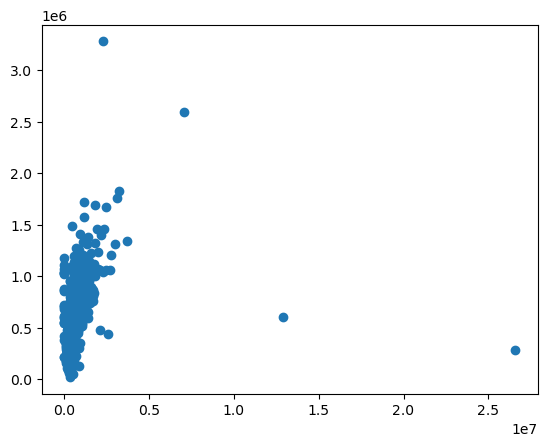

In [124]:
plt.scatter(y_test, predictions)

C:\Users\Somina\AppData\Local\Temp\ipykernel_11660\1326397652.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions),bins=50);


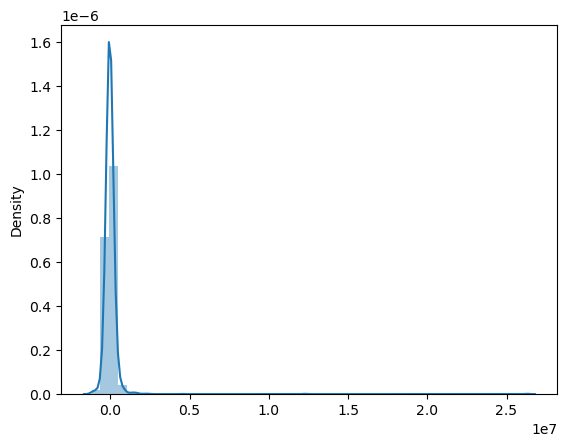

In [125]:
sns.distplot((y_test-predictions),bins=50);